# World Wide Products Inc.

## Shipping and delivering to a place near you

#### Author: Ruturaj Kiran Vaidya

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path.append('/usr/local/lib64/python3.7/site-packages/')
# Facebook Pro
from fbprophet import Prophet

ModuleNotFoundError: No module named 'pystan._api'

#### Dataset: <a>https://www.kaggle.com/felixzhao/productdemandforecasting</a>

### Importing Dataset and Feature Engineering

In [2]:
forecast = pd.read_csv("../data/external/historical_product_demand.csv").dropna()

In [3]:
forecast.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [4]:
forecast.shape

(1037336, 5)

In [5]:
# Describe the dataset
# We have to build forecasting model to get the demand for the particular product
# As can be seen from the description, Product_1359 is a top product and there are 2160 unique products with
# 33 unique categories
forecast.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1037336
unique,2160,4,33,1729,3749
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,470266,2075,112263


In [6]:
# Lets select the dataframe containing only Product_1359
product = forecast.loc[forecast['Product_Code'].isin(["Product_1359"])]
# Dropping the unwanted columns and now we know that the dataset "product" belongs to the
# product "Product_1359"
del product["Warehouse"]
del product["Product_Category"]
del product["Product_Code"]
product = product.reset_index(drop=True)
# Converting date into datetime object
product["Date"] = pd.to_datetime(product['Date'])
product.head()

,Date,Order_Demand
0,2012-04-18,80000
1,2012-05-21,70000
2,2012-06-26,80000
3,2012-07-17,100000
4,2012-08-24,100000


In [7]:
product.dtypes

Date            datetime64[ns]
Order_Demand            object
dtype: object

In [8]:
# type of Order_demand column is object
# When I tried to convert it into int, I found that there are some values line "(5000)"
print(product.shape)
product["Order_Demand"] = pd.to_numeric(product["Order_Demand"], errors='coerce')
product = product.dropna()
print(product.shape)
# This is nice! We don't have to remove those brackets as removes only few rows!

# What if there are multiple orders on same date?
# Sum all the orders for same date
product = product.groupby("Date").sum().reset_index()

# making Date as index to plot
product = product.set_index('Date')

(16936, 2)
(16912, 2)


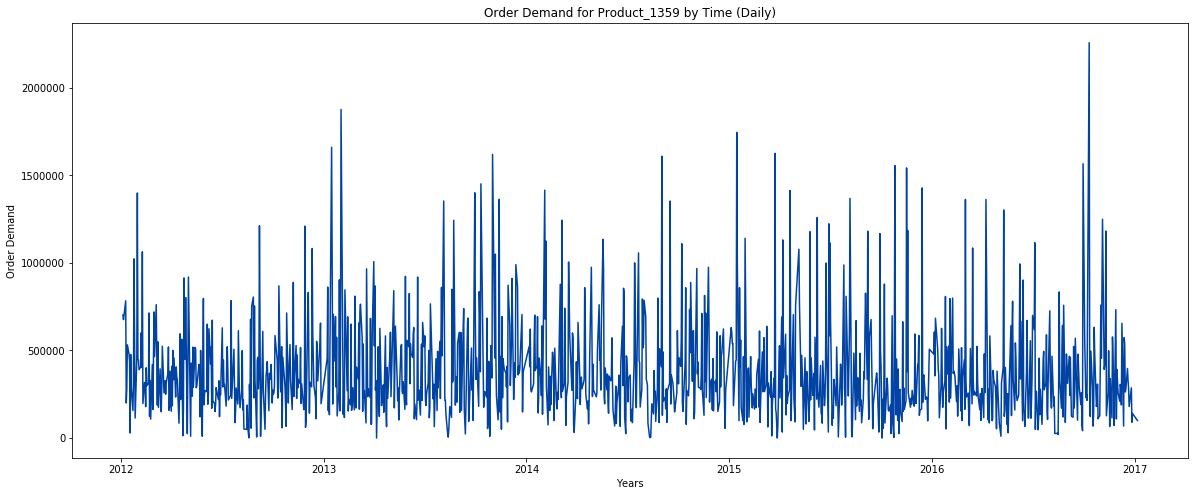

In [22]:
# plotting 
# Plot closing price

plt.figure(figsize=(20, 8))
plt.plot(product["Order_Demand"], color="#0043A4")
plt.title('Order Demand for Product_1359 by Time (Daily)')
plt.ylabel('Order Demand')
plt.xlabel('Years')
plt.grid(False)
plt.show();

#### Lets plot by summing all the orders values per month for better visualization

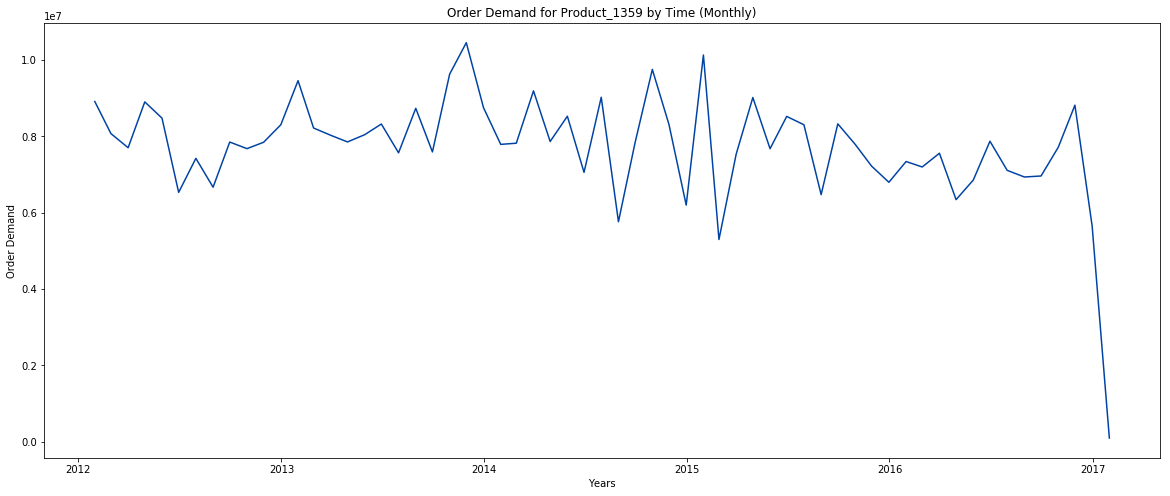

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(product.resample("M").sum()["Order_Demand"], color="#0043A4")
plt.title('Order Demand for Product_1359 by Time (Monthly)')
plt.ylabel('Order Demand')
plt.xlabel('Years')
plt.grid(False)
plt.show();

#### The above data makes sense as there are a lot less values for the year 2017